In [14]:
import pandas as pd
df = pd.read_csv("sales_data.csv")
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [16]:
df.describe()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,2023-07-02 17:42:43.199999744,5019.265230,25.355000,2475.304550,2728.440120,0.15239
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2023-03-30 00:00:00,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,2023-06-30 12:00:00,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,2023-10-12 00:00:00,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,2024-01-01 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.30000
std,29.573505,NaN,2846.790126,14.159006,1417.872546,1419.399839,0.08720


Total Sales by Region:
Region
North    1369612.51
East     1259792.93
West     1235608.93
South    1154250.86
Name: Sales_Amount, dtype: float64


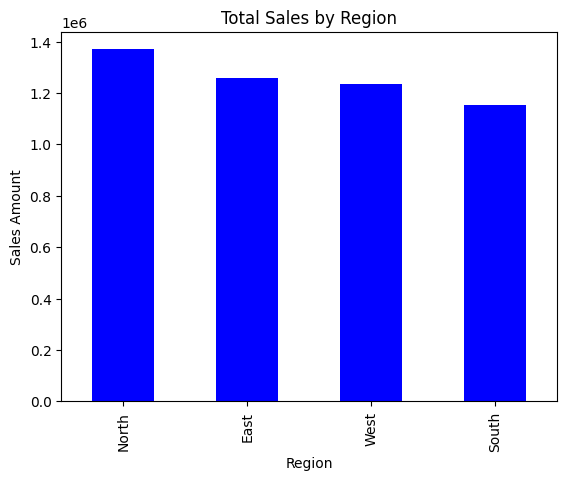


Total Sales by Product Category:
Product_Category
Clothing       1313474.36
Furniture      1260517.69
Electronics    1243499.64
Food           1201773.54
Name: Sales_Amount, dtype: float64


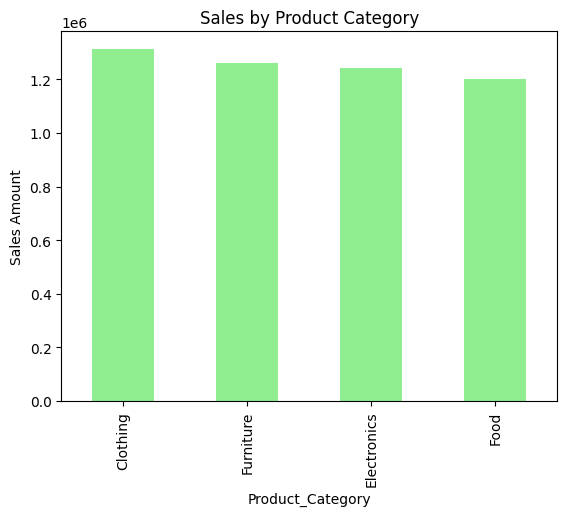


Total Sales by Sales Rep:
Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64


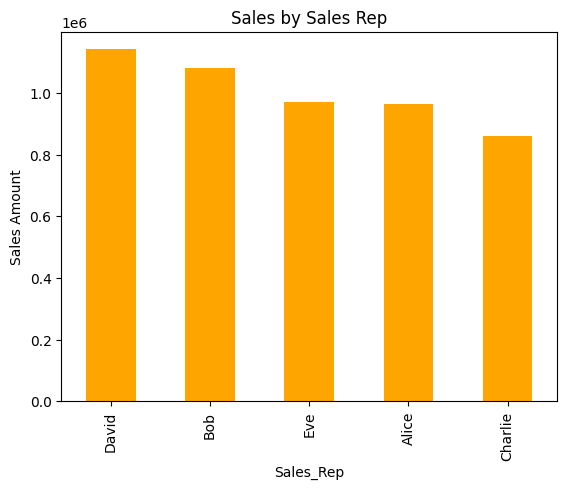

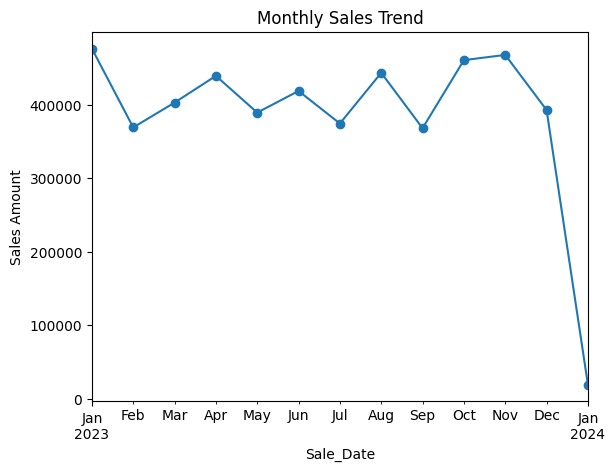

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales_Amount"].sum().sort_values(ascending=False)
print("Total Sales by Region:")
print(region_sales)

region_sales.plot(kind="bar", color="blue", title="Total Sales by Region")
plt.ylabel("Sales Amount")
plt.show()

category_sales = df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(category_sales)

category_sales.plot(kind="bar", color="lightgreen", title="Sales by Product Category")
plt.ylabel("Sales Amount")
plt.show()

rep_sales = df.groupby("Sales_Rep")["Sales_Amount"].sum().sort_values(ascending=False)
print("\nTotal Sales by Sales Rep:")
print(rep_sales)

rep_sales.plot(kind="bar", color="orange", title="Sales by Sales Rep")
plt.ylabel("Sales Amount")
plt.show()

df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
monthly_sales = df.groupby(df["Sale_Date"].dt.to_period("M"))["Sales_Amount"].sum()
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.ylabel("Sales Amount")
plt.show()
